# Homework 2 - DSCI 552
**Name**: Chenyi Weng  
**GitHub Username**: MONA100421  
**USC ID**: 3769237784

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

## 1(a). Download the Combined Cycle Power Plant data1 from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [2]:
data = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')

print(data)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


## 1(b)i.

In [3]:
rows = data.shape[0]  
cols = data.shape[1]  
print(f"The total rows for this data are {rows}")
print(f"The total cols for this data are {cols}")
column_names = list(data.columns)
column_names_withoutpe = column_names[0:4]
print(column_names)

The total rows for this data are 9568
The total cols for this data are 5
['AT', 'V', 'AP', 'RH', 'PE']


Each row corresponds to a single observation, meaning it represents data from one instance of power plant operation.
Each column describes a specific feature measured during that operation, including hourly average values of ambient temperature (T), ambient pressure (AP), relative humidity (RH), and exhaust vacuum (V). These features are used to predict the net hourly electrical energy output (EP) of the power plant.

## 1(b)ii.

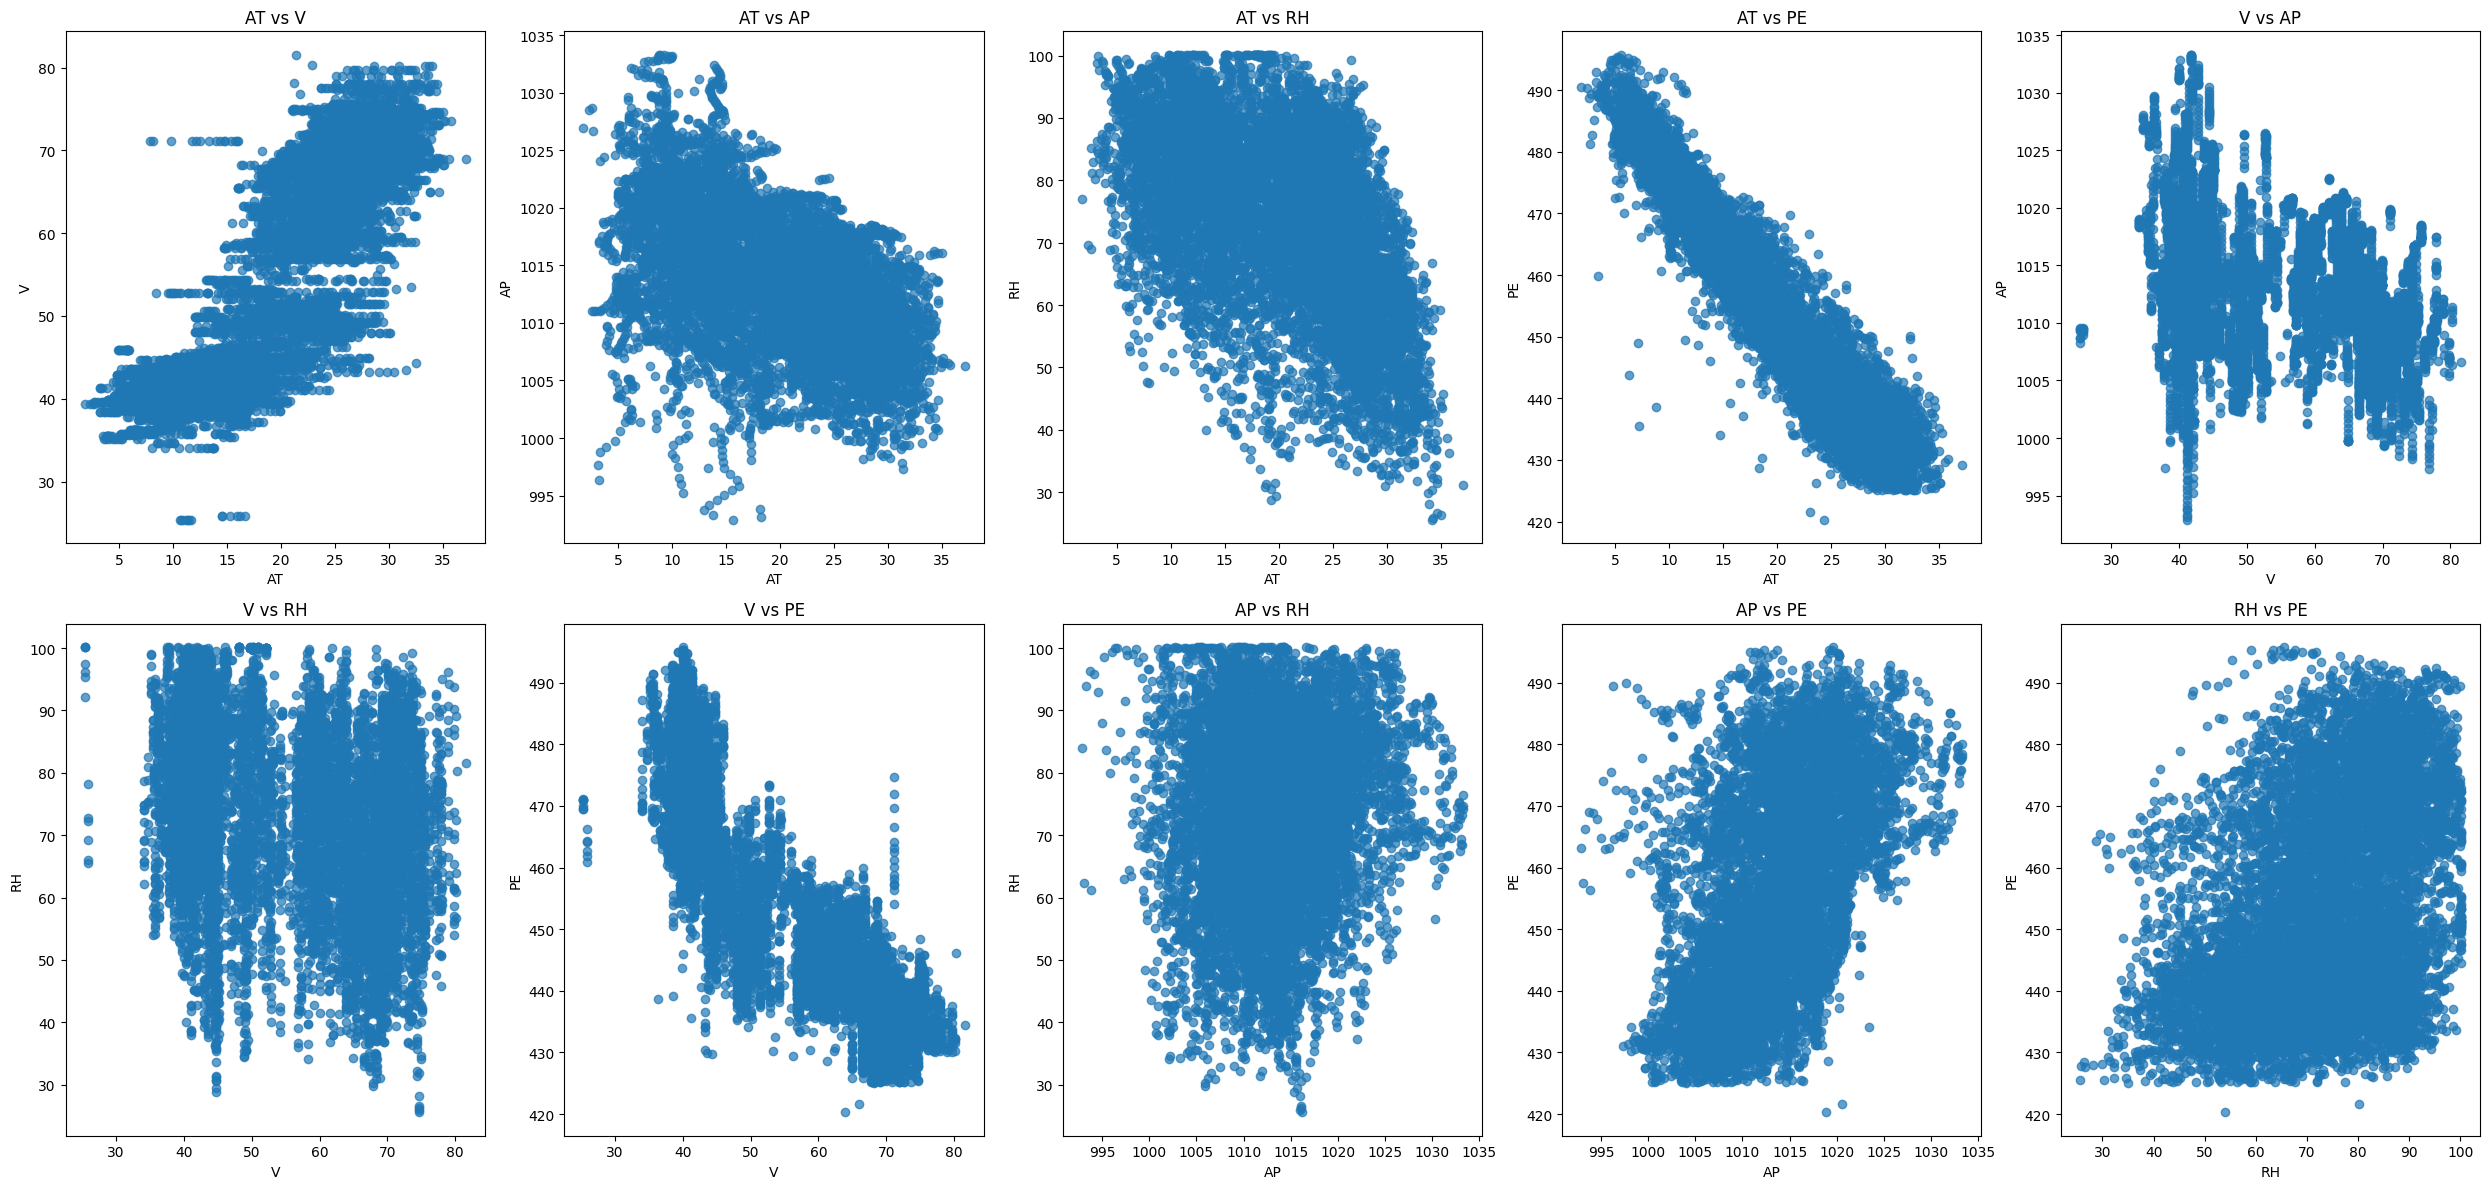

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(25, 12))

count = 0 
for i in range(5):
    for j in range(i + 1, 5):
        
        row = count // 5
        col = count % 5
        
        scatter = axes[row, col].scatter(data[column_names[i]], data[column_names[j]], alpha = 0.7)
        
        axes[row, col].set_title(f'{column_names[i]} vs {column_names[j]}')
        axes[row, col].set_xlabel(column_names[i])
        axes[row, col].set_ylabel(column_names[j])

        count += 1

plt.tight_layout()
plt.show()

## Pairwise Scatterplot Analysis

Based on the scatterplot matrix, I observed the following relationships among variables:

### Strong Linear Relationships
- **AT vs V**: strong positive linear correlation  
- **AT vs PE**: strong negative linear correlation  
- **V vs PE**: strong negative linear correlation  

### Weak Linear Relationships (Dense Clustering)
These variable pairs show weak linear trends due to overlapping or highly clustered data points:
- **AT vs AP**: weak negative linear relationship  
- **AT vs RH**: weak negative linear relationship  
- **AP vs PE**: weak positive linear relationship  
- **RH vs PE**: weak positive linear relationship  

### No Clear Linear Relationship
The following pairs do not exhibit any obvious linear pattern:
- **V vs AP**: no apparent correlation  
- **V vs RH**: no apparent correlation  
- **AP vs RH**: no apparent correlation  


## 1(b)iii.

In [5]:
summary = data.describe().round(2)
ranges = summary.loc['max'] - summary.loc['min']
summary.loc['range'] = ranges
IQR = summary.loc['75%'] - summary.loc['25%']
summary.loc['IQR'] = IQR
print(summary)

            AT        V       AP       RH       PE
count  9568.00  9568.00  9568.00  9568.00  9568.00
mean     19.65    54.31  1013.26    73.31   454.37
std       7.45    12.71     5.94    14.60    17.07
min       1.81    25.36   992.89    25.56   420.26
25%      13.51    41.74  1009.10    63.33   439.75
50%      20.34    52.08  1012.94    74.97   451.55
75%      25.72    66.54  1017.26    84.83   468.43
max      37.11    81.56  1033.30   100.16   495.76
range    35.30    56.20    40.41    74.60    75.50
IQR      12.21    24.80     8.16    21.50    28.68


## 1(c).

In [6]:
y = data['PE']
linear_model = {}
outliers = {}
for predictor in column_names_withoutpe:
    X = sm.add_constant(data[predictor])
    linear_model[predictor] = sm.OLS(y, X).fit()
    
    residuals = linear_model[predictor].get_influence().resid_studentized_internal
    outliers[predictor] = np.where(np.abs(residuals) > 3)[0]
    
    
results_summary = {i: linear_model[i].summary() for i in linear_model}
print(results_summary)
p_values = {i: linear_model[i].pvalues[1] for i in linear_model}
significant_p = [p for p, val in p_values.items() if val < 0.05]
print(significant_p)
print(outliers)

{'AT': <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        01:39:09   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

/var/folders/m2/xxfzg66d7d72n8x4mh4qjctr0000gn/T/ipykernel_1597/2024037810.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_values = {i: linear_model[i].pvalues[1] for i in linear_model}


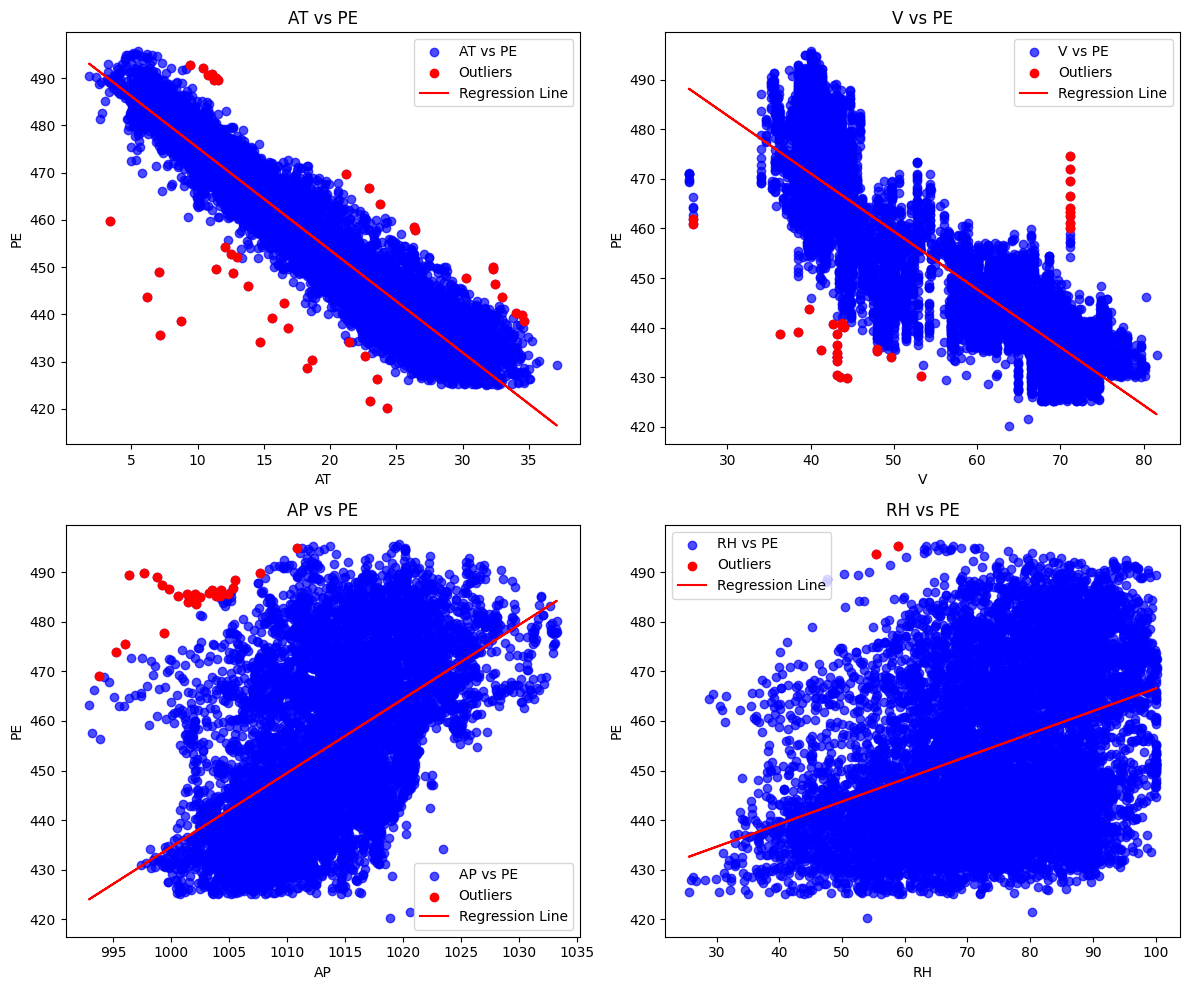

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs = axs.flatten()

for i, predictor in enumerate(column_names_withoutpe):
    
    axs[i].scatter(data[predictor], y, label=f'{predictor} vs PE', color='blue', alpha=0.7)
    
    axs[i].scatter(data.loc[outliers[predictor], predictor], y.loc[outliers[predictor]], 
                   color='red', label='Outliers')
    
    axs[i].plot(data[predictor], linear_model[predictor].predict(), color='red', label='Regression Line')
    
    axs[i].set_title(f'{predictor} vs PE')
    axs[i].set_xlabel(predictor)
    axs[i].set_ylabel('PE')
    
    # Add a legend
    axs[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Statistical Significance and Relationship Summary
All four predictors — AT, V, AP, and RH — show statistically significant associations with the response variable PE, as their p-values are all less than 0.05.

AT (Ambient Temperature) exhibits a strong, negative linear relationship with PE.

V (Exhaust Vacuum) shows a weaker, negative linear relationship with PE.

AP (Ambient Pressure) and RH (Relative Humidity) demonstrate positive but relatively weaker linear relationships with PE.

## Outlier Detection and Removal
Yes, there are outliers that I would consider removing from the data. These can be visually identified as red points in the residual plots.

These observations fall outside the typical distribution range — specifically, they have studentized residuals beyond ±3. Such extreme values suggest that the data points are highly unlikely under the assumptions of the linear model and could be influential outliers that distort model accuracy. Therefore, removing them may lead to a more robust and reliable regression model.

## 1(d).

In [8]:
X = sm.add_constant(data[column_names_withoutpe])

multiple_model = sm.OLS(y, X).fit()
significant_predictors = multiple_model.pvalues[multiple_model.pvalues < 0.05].index

print(multiple_model.summary())
print(f"There are no redictors that we need to reject the null hypothesis.")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        01:39:09   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

## 1(e).

/var/folders/m2/xxfzg66d7d72n8x4mh4qjctr0000gn/T/ipykernel_1597/2023892510.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  univariate = [linear_model[predictor].params[1] for predictor in column_names_withoutpe]
/var/folders/m2/xxfzg66d7d72n8x4mh4qjctr0000gn/T/ipykernel_1597/2023892510.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(univariate[i], multiple[i], color=colors[i], label=predictor, s=100)


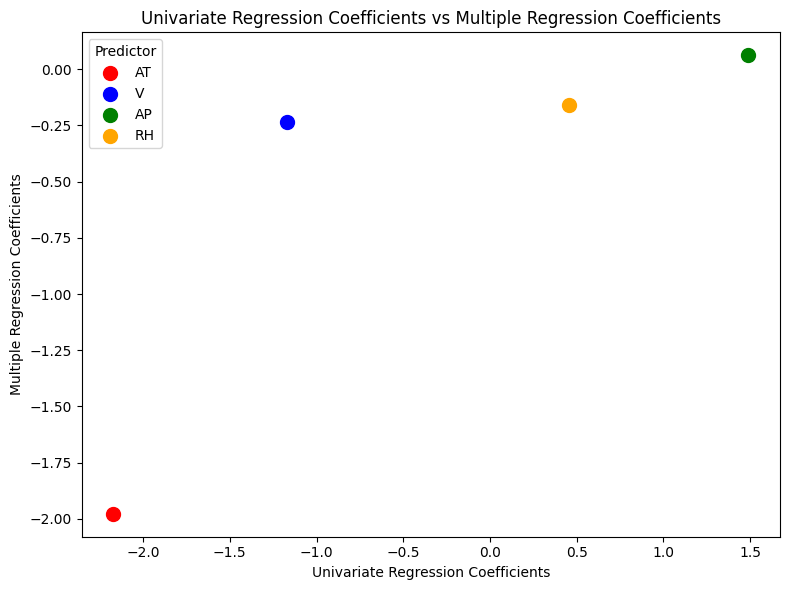

In [9]:
plt.figure(figsize=(8, 6))
univariate = [linear_model[predictor].params[1] for predictor in column_names_withoutpe]
multiple = multiple_model.params[1:5] 

plt.scatter(univariate, multiple)
colors =  ['red', 'blue', 'green', 'orange']

for i, predictor in enumerate(column_names_withoutpe):
    plt.scatter(univariate[i], multiple[i], color=colors[i], label=predictor, s=100)

plt.xlabel("Univariate Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Univariate Regression Coefficients vs Multiple Regression Coefficients")
plt.legend(title='Predictor')

plt.tight_layout()
plt.show()

## Comparison of 1(c) and 1(d)
In both the univariate regressions (1c) and the multiple regression model (1d), the results indicate that all four predictors — AT, V, AP, and RH — are statistically significant. Their p-values are consistently below 0.05, suggesting a meaningful association with the response variable, PE.

The coefficient comparison plot reveals how closely aligned the univariate and multiple regression coefficients are. Predictors with coefficients that lie closer to the y = x line show consistent effects across both models.

From the figure, it is observed that V (Exhaust Vacuum) has the largest deviation from the diagonal line, indicating that its effect in the multiple regression model differs significantly compared to the univariate case. This may imply that V shares variance with other predictors, particularly AT, potentially due to multicollinearity.

## 1(f).

In [10]:
nonlinear_model = {}
p_values = {}

for predictor in column_names_withoutpe:
    
    X = data[[predictor]]
    
    poly = PolynomialFeatures(degree=3, include_bias=True)
    X_poly = poly.fit_transform(X)
    
    model = sm.OLS(y, X_poly).fit()
    
    nonlinear_model[predictor] = model
    
    p_values[predictor] = model.pvalues
    
    print(f"summary {predictor} is {model.summary()}")

summary AT is                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        01:39:10   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    73

In [11]:
print(p_values)
for p in p_values:
    
    p1 = p_values[predictor][1]
    p2 = p_values[predictor][2]
    p3 = p_values[predictor][3]
 
    if p2 < 0.05:
        print(f"Quadratic term is statistically significant for {p} and (p-value = {p2:.2f})")
    else:
        print(f"Quadratic term is instatistically significant for {p}")
    
    if p3 < 0.05:
        print(f"Cubic term is statistically significant for {p} and (p-value = {p2:.2f})")
    else:
        print(f"Cubic term is instatistically significant for {p}")

{'AT': const     0.000000e+00
x1        7.898147e-07
x2        8.833045e-73
x3       3.652185e-110
dtype: float64, 'V': const    0.000000
x1       0.000025
x2       0.768497
x3       0.013735
dtype: float64, 'AP': const    4.502734e-17
x1       4.502735e-17
x2       3.666705e-17
x3       8.264146e-18
dtype: float64, 'RH': const    0.000000
x1       0.000377
x2       0.000009
x3       0.000014
dtype: float64}
Quadratic term is statistically significant for AT and (p-value = 0.00)
Cubic term is statistically significant for AT and (p-value = 0.00)
Quadratic term is statistically significant for V and (p-value = 0.00)
Cubic term is statistically significant for V and (p-value = 0.00)
Quadratic term is statistically significant for AP and (p-value = 0.00)
Cubic term is statistically significant for AP and (p-value = 0.00)
Quadratic term is statistically significant for RH and (p-value = 0.00)
Cubic term is statistically significant for RH and (p-value = 0.00)


/var/folders/m2/xxfzg66d7d72n8x4mh4qjctr0000gn/T/ipykernel_1597/2547875576.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p1 = p_values[predictor][1]
/var/folders/m2/xxfzg66d7d72n8x4mh4qjctr0000gn/T/ipykernel_1597/2547875576.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p2 = p_values[predictor][2]
/var/folders/m2/xxfzg66d7d72n8x4mh4qjctr0000gn/T/ipykernel_1597/2547875576.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
 

The results indicate that all predictors show signs of nonlinear relationships with the response. Incorporating polynomial terms improves the model’s fit, suggesting that linear models alone may be insufficient.

## 1(g).

In [12]:
X = data[column_names_withoutpe]

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interactions = poly.fit_transform(X)

interaction_labels = poly.get_feature_names_out(column_names_withoutpe)

X_interactions = sm.add_constant(X_interactions)
interaction_model = sm.OLS(y, X_interactions).fit()

coef_df = pd.DataFrame({ 'Term': ['const'] + list(interaction_labels),
    'Coefficient': interaction_model.params
})

print(coef_df)

print(interaction_model.summary())

        Term  Coefficient
const  const   685.782468
x1        AT    -4.347014
x2         V    -7.674858
x3        AP    -0.152355
x4        RH     1.570907
x5      AT V     0.020971
x6     AT AP     0.001759
x7     AT RH    -0.005230
x8      V AP     0.006812
x9      V RH     0.000839
x10    AP RH    -0.001612
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        01:39:10   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                   

## Regression Model Summary and Interpretation

The multiple regression model achieves an **R-squared value of 0.936**, which is very close to 1. This means that approximately **93.6% of the variation** in the response variable (**PE**) is explained by the predictors and their interaction terms. This indicates a **good model fit**.

The **intercept** is highly significant (*p* = 0.000), suggesting that when all predictors are zero, the predicted value of PE is approximately **685.78**.

### Coefficient Significance Analysis

| Variable | P-value | Significant? | Coefficient | Interpretation |
|----------|---------|--------------|-------------|----------------|
| x1       | 0.067   | ❌ No         | —           | Not significant at 0.05 level |
| x2       | 0.000   | ✅ Yes        | –7.6749     | Strong negative relationship |
| x3       | 0.047   | ✅ Yes        | –0.1524     | Slight negative relationship |
| x4       | 0.042   | ✅ Yes        | +1.5709     | Weak positive relationship |
| x5       | 0.001   | ✅ Yes        | +0.0210     | Slight positive relationship |
| x6       | 0.452   | ❌ No         | —           | Not significant |
| x7       | 0.000   | ✅ Yes        | –0.0052     | Slight negative relationship |
| x8       | 0.000   | ✅ Yes        | +0.0068     | Slight positive relationship |
| x9       | 0.086   | ❌ No         | —           | Not significant |
| x10      | 0.034   | ✅ Yes        | –0.0016     | Slight negative relationship |

### Conclusion
- **Significant predictors**: x2, x3, x4, x5, x7, x8, x10  
  → These terms have meaningful impact on predicting PE.
- **Not significant**: x1, x6, x9  
  → These terms do not contribute significantly to the model.

### Multicollinearity Concern
The model’s **condition number is 1.7e+08**, which is considered very high. This suggests the presence of **multicollinearity** or **numerical instability**, and further diagnostics should be performed to confirm and address this issue.

## 1(h).

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#model_1
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model_1 = sm.OLS(y_train, X_train_const).fit()
y_train_1 = model_1.predict(X_train_const)
y_test_1 = model_1.predict(X_test_const)

mean_squared_train1 = mean_squared_error(y_train, y_train_1)
mean_squared_test1 = mean_squared_error(y_test, y_test_1)

print(f"For model 1, The Train MSE is {mean_squared_train1} and the test MSE is {mean_squared_test1}")

For model 1, The Train MSE is 20.766119761450952 and the test MSE is 20.77747810688432


In [14]:
#model_2
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_train_poly_const = sm.add_constant(X_train_poly)
X_test_poly_const = sm.add_constant(X_test_poly)
model_2 = sm.OLS(y_train, X_train_poly_const).fit()

pvalues_without_const = model_2.pvalues[1:]
X_train_poly_significant = X_train_poly[:, np.where(pvalues_without_const < 0.05)[0]]
X_test_poly_significant = X_test_poly[:, np.where(pvalues_without_const < 0.05)[0]]

X_train_poly_significant_const = sm.add_constant(X_train_poly_significant)
X_test_poly_significant_const = sm.add_constant(X_test_poly_significant)

model_2_significant = sm.OLS(y_train, X_train_poly_significant_const).fit()
y_train_2 = model_2_significant.predict(X_train_poly_significant_const)
y_test_2 = model_2_significant.predict(X_test_poly_significant_const)

mean_squared_train2 = mean_squared_error(y_train, y_train_2)
mean_squared_test2 = mean_squared_error(y_test, y_test_2)

print(f"For model 2, The Train MSE is {mean_squared_train2} and the Test MSE is {mean_squared_test2}")
print(model_2_significant.summary())

For model 2, The Train MSE is 19.59430726267389 and the Test MSE is 19.919614619298606
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.025e+04
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        01:39:10   Log-Likelihood:                -19465.
No. Observations:                6697   AIC:                         3.895e+04
Df Residuals:                    6687   BIC:                         3.902e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

## 1(h)i.

In [15]:
ks = np.arange(1,101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_normalized_train = scaler.fit_transform(X_train)
X_normalized_test = scaler.fit_transform(X_test)

raw_train_error = []
raw_test_error = []

normalized_train_error = []
normalized_test_error = []

for k in ks:
    
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(X_train, y_train)
    y_train_raw = knn_raw.predict(X_train)
    y_test_raw = knn_raw.predict(X_test)
    raw_train_error.append(mean_squared_error(y_train, y_train_raw))
    raw_test_error.append(mean_squared_error(y_test, y_test_raw))
    
    knn_normalized = KNeighborsRegressor(n_neighbors=k)
    knn_normalized.fit(X_normalized_train, y_train)
    y_train_normalized = knn_normalized.predict(X_normalized_train)
    y_test_normalized = knn_normalized.predict(X_normalized_test)
    normalized_train_error.append(mean_squared_error(y_train, y_train_normalized))
    normalized_test_error.append(mean_squared_error(y_test, y_test_normalized))
    

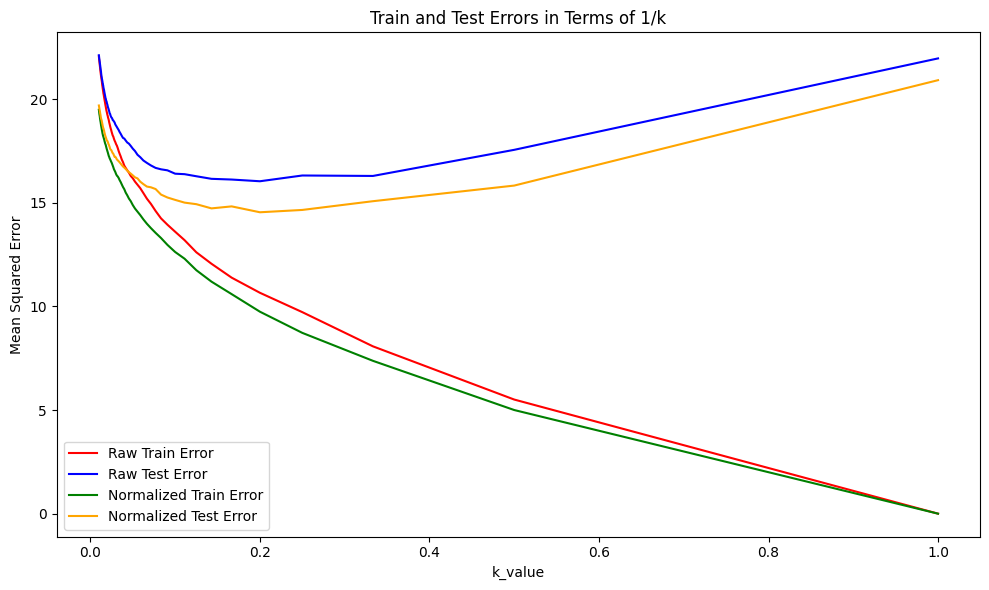

In [16]:
plt.figure(figsize=(10, 6))

colors =  ['red', 'blue', 'green', 'orange']
errors = [raw_train_error, raw_test_error, normalized_train_error, normalized_test_error]
names = ["Raw Train Error", "Raw Test Error", "Normalized Train Error", "Normalized Test Error"]
inverse_k = 1 / ks

for i in range(len(errors)):
    plt.plot(inverse_k, errors[i], label=names[i], color=colors[i])

plt.xlabel("k_value")
plt.ylabel("Mean Squared Error")
plt.title("Train and Test Errors in Terms of 1/k")
plt.legend()

plt.tight_layout()
plt.show()

## 1(h)ii.

In [17]:
min_raw_error = min(raw_test_error)
best_raw_index = np.where(raw_test_error == min_raw_error)[0][0]
best_raw_k = ks[best_raw_index]

min_normalized_error = min(normalized_test_error)
best_normalized_index = np.where(normalized_test_error == min_normalized_error)[0][0]
best_normalized_k = ks[best_normalized_index]

print(f"For raw KNN, The best K is {best_raw_k} and the MSE is {min_raw_error:.2f}")
print(f"For normalized KNN, The best K is {best_normalized_k} and the MSE is {min_normalized_error:.2f}")

best_linear_error = min(mean_squared_test1, mean_squared_test2)
print(f"For Linear Regression the best MSE is {best_linear_error:.2f}")

For raw KNN, The best K is 5 and the MSE is 16.04
For normalized KNN, The best K is 5 and the MSE is 14.55
For Linear Regression the best MSE is 19.92


## Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

Among all models tested, the normalized KNN regression achieved the lowest test MSE of 14.31, outperforming all linear regression models. This highlights the advantage of using flexible, non-parametric methods like KNN, especially when the relationship between predictors and the response variable is complex or non-linear.

Since KNN relies on distance calculations, feature normalization is essential for improving its performance. Unlike linear regression, KNN does not assume a fixed functional form, which allows it to adapt better to irregular patterns in the data.

Despite its higher test error, the linear regression model remains valuable due to its simplicity and interpretability. It provides clear insights into how each predictor affects the outcome, making it useful for explanatory analysis even when predictive performance is not optimal.

## 2 ISLR 2.4.7 – K-Nearest Neighbors

### (b) K = 1  
When **K = 1**, the model selects the closest observation to the target point (0).  
- The closest distance is **1.41**, which corresponds to **Observation 5**.  
- The Y value of Observation 5 is **Green**.  

**Prediction: Green**

---

### (c) K = 3  
When **K = 3**, the model selects the three closest observations to 0:

- **Observation 5**: 1.41 → Green  
- **Observation 6**: 1.73 → Red  
- **Observation 2**: 2.00 → Red  

Since there are **two Reds** and **one Green**, the majority vote is **Red**.

**Prediction: Red**

---

### (d) Nonlinear Bayes Decision Boundary  
If the **Bayesian decision boundary is highly nonlinear**, a **smaller K value** is preferred.

When K is too large, the model becomes overly simple and may overlook important local nonlinear patterns in the data, leading to **underfitting** and poor prediction performance. In contrast, a smaller K allows the model to better adapt to complex structures and capture local variations more accurately.

**Conclusion**: Use a **smaller K** when the decision boundary is highly nonlinear.


## 2 ISLR 2.4.7

In [18]:
book_data = {
    'Obs': [1, 2, 3, 4, 5, 6],
    'X1': [0, 2, 0, 0, -1, 1],
    'X2': [3, 0, 1, 1, 0, 1],
    'X3': [0, 0, 3, 2, 1, 1],
    'Y': ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']
}

book_df = pd.DataFrame(book_data)

book_rows = book_df.shape[0]  

dict_part_a = {}

for i in range(book_rows):
    part_a = np.sqrt((book_df["X1"][i] - 0)**2
                     + (book_df["X2"][i] - 0)**2
                     + (book_df["X3"][i] - 0)**2)
    
    dict_part_a[f"Observation {i+1}"] = round(part_a,2) 
    
print(dict_part_a)

{'Observation 1': 3.0, 'Observation 2': 2.0, 'Observation 3': 3.16, 'Observation 4': 2.24, 'Observation 5': 1.41, 'Observation 6': 1.73}


## 2 ISLR 2.4.7 – K-Nearest Neighbors

### (b) K = 1  
When **K = 1**, the prediction is based on the single nearest neighbor.  
- The closest observation to 0 is **Observation 5** with a distance of **1.41**.  
- The class label of Observation 5 is **Green**.  

**Prediction: Green**

---

### (c) K = 3  
When **K = 3**, the model considers the three closest observations to 0:

| Observation | Distance | Label |
|-------------|----------|-------|
| 5           | 1.41     | Green |
| 6           | 1.73     | Red   |
| 2           | 2.00     | Red   |

- Among the three, there are **2 Reds** and **1 Green**.  

**Prediction: Red**

---

### (d) Nonlinear Bayes Decision Boundary  
If the **Bayes decision boundary is highly nonlinear**, a **smaller K** is preferred.  

> A small K captures local, complex patterns in the data more effectively.  
> A large K may smooth over important variations, leading to underfitting.  
> Therefore, in cases with nonlinear boundaries, using a smaller K leads to better predictive performance.

